# FMCW Processing 

- need to understand why a single known target delay can estimate phase errors for ALL frequency bins? 
    - this assumes the phase error is constant across the sweep right? so what if there was a mechanism to estimate phase error for a a target at all ranges? 

    

In [39]:
import numpy as np 
from numpy.fft import fft, ifft
import matplotlib.pyplot as plt
import scipy 
import scipy.constants as sc

In [ ]:
# Top Level Constants 
f_c_hz  = 10e9          # Carrier Frequency(hz)
B_hz    = 50e6          # Sweep Bandwidth(hz)
T_s     = 500e-6        # Sweep Period(s)
alpha   = B_hz / T_s    # Chirp Rate i.e. bandwidth over period (Hz/s)

target_distance_m = 10000 # Example target distance
tau  = (2 * target_distance_m)/sc.speed_of_light # Propogation delay for target

t = np.linspace(0, 1.2*T_s, 2000) # Time samples for TX 
t_delayed = t  - tau   # Time samples for RX

In [ ]:
def phi_tx(t,f_c_hz, alpha): 
    '''Phase equation for perfectly linear phase'''
    return 2*np.pi * (f_c_hz + (1/2 * alpha*t**2))

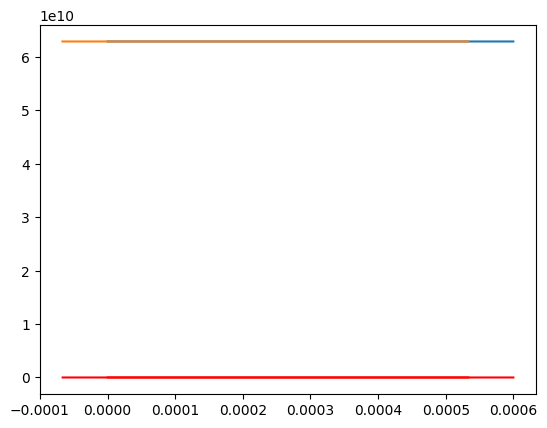

In [ ]:



phase = phi_tx(t, f_c_hz, alpha)
plt.plot(t, phase)
plt.plot(t[1:], np.diff(phase), color='red')

phase = phi_tx(t_delayed, f_c_hz, alpha)
plt.plot(t_delayed, phase)
plt.plot(t_delayed[1:], np.diff(phase), color='red')


/Users/humdaan/repos/fmcw/.venv/lib/python3.12/site-packages/matplotlib/cbook.py:1719: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/Users/humdaan/repos/fmcw/.venv/lib/python3.12/site-packages/matplotlib/cbook.py:1355: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


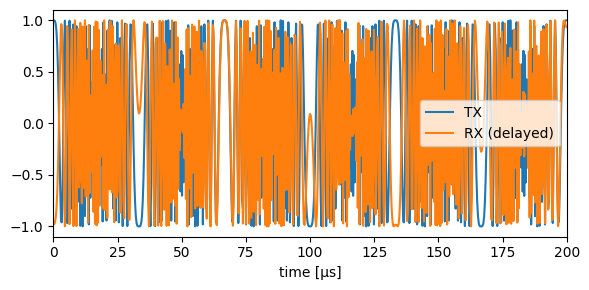

In [38]:
s_tx = np.exp(1j*phi_tx(t,         f_c_hz, alpha))
s_rx = np.exp(1j*phi_tx(t_delayed, f_c_hz, alpha))

plt.figure(figsize=(6,3))
plt.plot(t*1e6, s_tx, label='TX')
plt.plot(t*1e6, np.real(s_rx), label='RX (delayed)')
plt.xlim(0, 200)               # zoom to first 200 µs
plt.xlabel('time [µs]'); plt.legend(); plt.tight_layout()


In [45]:
np.unique(t - t_delayed)

array([6.6712819e-05])